# Figure 1 VNS Enhances Oligodendrogenesis

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from tqdm import tqdm_notebook as tqdm

import nelpy as nel
import nelpy.plotting as npl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch
import seaborn as sns

# Manuscript Mode Setup (White Background / Black Text)
npl.setup(font='Arial', font_scale=2, 
          rc=({'figure.figsize': (3, 3), 
               'font.size': 12, 'axes.labelsize': 12, 
               'axes.titlesize': 12, 'legend.fontsize': 10, 
               'ytick.labelsize': 10, 'xtick.labelsize': 10,
               'xtick.direction': 'out', 'ytick.direction': 'out', 
               'xtick.major.size': 3, 'ytick.major.size': 3,
               'pdf.fonttype': 42, 'ps.fonttype': 42,
               
               # --- MANUSCRIPT MODE OVERRIDES ---
               'figure.facecolor': 'None',  # Transparent background
               'axes.facecolor': 'None',    # Transparent axes
               'savefig.facecolor': 'None', # Transparent on save
               
               'text.color': 'black',       # Black Text
               'axes.labelcolor': 'black',  # Black Axis Labels
               'xtick.color': 'black',      # Black Ticks
               'ytick.color': 'black',      # Black Ticks
               'axes.edgecolor': 'black',   # Black Spines
               
               'legend.facecolor': 'None',  # Transparent Legend
               'legend.edgecolor': 'None',  # No border on legend
               'legend.labelcolor': 'black' # Black Legend Text
               }))

import warnings
warnings.filterwarnings('ignore')
import logging

# Set the root logger's level to ERROR to suppress WARNING messages
logging.getLogger().setLevel(logging.ERROR)


%matplotlib inline 

df_fig1 = pd.read_csv("../2025-09-30Fig1.csv")
df_fig1

,ID,Marker for Cup at 34 days,Behavior,Day,phase_bin_10 days,"phase_bin_10 days 2, copy",phase_bin_7Days,phase_bin_7Days_complete,daysInPhase2,days_between_TP,...,Replacement Rate w/Phase for graph help column,Replacement rate w/phase for graph,Max_loss,MaxGain_normToLoss,rate between each tp,max rate after stim,max rate during stim,Asymptote,Growth Rate,Inflection Point
0,MOBP61,NaN,unstimulated,0,baseline,baseline,NaN,NaN,NaN,NaN,...,61,NaN,NaN,NaN,NaN,NaN,NaN,61.676662,0.213034,4.782487
1,MOBP61,NaN,unstimulated,4,cuprizone diet,cuprizone diet,NaN,NaN,NaN,4.0,...,61,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,MOBP61,NaN,unstimulated,7,cuprizone diet,cuprizone diet,NaN,NaN,NaN,3.0,...,61,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
3,MOBP61,NaN,unstimulated,11,cuprizone diet,cuprizone diet,NaN,NaN,NaN,4.0,...,61,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
4,MOBP61,NaN,unstimulated,14,cuprizone diet,cuprizone diet,NaN,NaN,NaN,3.0,...,61,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,MOBP70,NaN,VNS,50,post-learning1,post-learning3,post-learning3,post-learning3,7.0,2.0,...,55,NaN,NaN,NaN,0.602410,NaN,NaN,NaN,NaN,NaN
226,MOBP70,NaN,VNS,53,post-learning1,post-learning3,post-learning3,post-learning3,7.0,3.0,...,55,NaN,NaN,NaN,1.204819,NaN,NaN,NaN,NaN,NaN
227,MOBP70,NaN,VNS,55,post-learning1,post-learning3,post-learning3,post-learning3,7.0,2.0,...,55,0.860585,83.838384,68.674699,0.602410,2.409639,NaN,NaN,NaN,NaN
228,MOBP70,NaN,VNS,60,NaN,NaN,NaN,NaN,NaN,5.0,...,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Panels A & B: Experimental Design & Timeline

**In vivo imaging of VNS-mediated recovery.** We utilized a longitudinal two-photon imaging approach to track oligodendrocyte dynamics in the motor cortex of MOBP-EGFP mice throughout demyelination and recovery.

<div class="alert alert-block alert-info">
    <b>Experimental Context: Protocol Design</b><br>
    To isolate the effects of VNS on repair, we designed a specific intervention timeline (<i>Fig. 1b</i>):
    <ul>
        <li><b>Induction:</b> Demyelination was induced via a 0.2% cuprizone diet for 3 weeks.</li>
        <li><b>Intervention:</b> VNS (or Sham) was delivered daily for 7 days. Crucially, stimulation began <b>3 days after</b> cuprizone removal, targeting the early recovery phase rather than the injury phase.</li>
        <li><b>Validation:</b> VNS efficacy was confirmed by acute physiological markers (<i>see Extended Data Fig. 1d,e</i>).</li>
    </ul>
</div>

![Figure 1 Panel A](figure1/mouseWithVNCuffCranialWindow.svg)

![Figure 1 Panel B](figure1/panelB.svg)

## Panels C & D: Longitudinal Tracking of Demyelination

**Visualizing cellular turnover.** Longitudinal imaging allowed us to classify individual cells as stable (yellow), lost (pink), or newly generated (blue) over the 7-week observation period (<i>Fig. 1c</i>).

<div class="alert alert-block alert-success">
    <b>Model Validation: Robust Demyelination</b><br>
    Before assessing recovery, we confirmed the validity of the injury model:
    <ul>
        <li><b>Significant Loss (Fig. 1d):</b> Individual animal traces confirm that cuprizone treatment induced a robust and significant loss of oligodendrocytes across the cohort.</li>
        <li><b>Consistency:</b> The trajectory of oligodendrocyte loss was consistent with our previous work, establishing a reliable baseline from which to measure VNS-mediated regeneration.</li>
    </ul>
</div>

![Figure 1 Panel C](figure1/panelC.svg)

![Figure 1 Panel D](figure1/panelD.svg)

## Panel e (OL Loss @ 4 wks)
![Figure 1 Panel E](figure1/panelE.svg)

In [15]:
from IPython.display import display, HTML

# Formatting function
def pretty_print_stats(df, title):
    print(f"\n{title}")
    display(HTML(df.to_html(index=False, classes='table table-striped table-hover', justify='left')))

# --- PANEL E DATA (Manually entered from text) ---
data_e = {
    "Comparison": ["VNS vs. Unstimulated Controls"],
    "Metric": ["% Oligodendrocyte Loss (4 weeks post-cuprizone)"],
    "VNS Mean ± SEM": ["62.92 ± 7.82%"],
    "Control Mean ± SEM": ["76.64 ± 5.10%"],
    "Test": ["Student's t-test"],
    "P-Value": ["0.1632 (n.s.)"],
    "Conclusion": ["No significant difference in injury severity"]
}
df_e = pd.DataFrame(data_e)

# Display
pretty_print_stats(df_e, "--- Panel E Statistics: Baseline Injury Severity ---")


--- Panel E Statistics: Baseline Injury Severity ---


Comparison,Metric,VNS Mean ± SEM,Control Mean ± SEM,Test,P-Value,Conclusion
VNS vs. Unstimulated Controls,% Oligodendrocyte Loss (4 weeks post-cuprizone),62.92 ± 7.82%,76.64 ± 5.10%,Student's t-test,0.1632 (n.s.),No significant difference in injury severity


<div class="alert alert-block alert-success">
    <b>Model Validation: Equal Baseline Injury</b><br>
    Crucially, the extent of demyelination was comparable between groups prior to the intervention:
    <ul>
        <li><b>No Bias:</b> There was no significant difference in the percentage of oligodendrocyte loss between VNS-treated animals (<b>62.92%</b>) and unstimulated controls (<b>76.64%</b>; <i>p = 0.1632</i>).</li>
        <li><b>Implication:</b> This confirms that the subsequent enhancement in regeneration observed in the VNS group is not an artifact of milder injury, but rather a direct effect of the stimulation on the repair process.</li>
    </ul>
</div>

## Panel f (New vs. Lost OLs)
![Figure 1 Panel F](figure1/panelF.svg)

In [16]:
# --- PANEL F DATA (ANCOVA Results) ---
data_f = {
    "Factor": ["Group Effect (VNS vs Control)", "Cumulative Loss Effect", "Interaction (Group × Loss)"],
    "Metric": ["Cumulative % New OLs (4 weeks)", "", ""],
    "Test": ["ANCOVA (Unequal Slopes)", "", ""],
    "P-Value": ["0.0157 (*)", "0.0045 (**)", "0.0136 (*)"],
    "Conclusion": ["Significant Treatment Effect", "Regeneration scales with injury", "VNS amplifies the response"]
}
df_f = pd.DataFrame(data_f)

# Display
pretty_print_stats(df_f, "--- Panel F Statistics: VNS Amplifies Regeneration ---")


--- Panel F Statistics: VNS Amplifies Regeneration ---


Factor,Metric,Test,P-Value,Conclusion
Group Effect (VNS vs Control),Cumulative % New OLs (4 weeks),ANCOVA (Unequal Slopes),0.0157 (*),Significant Treatment Effect
Cumulative Loss Effect,,,0.0045 (**),Regeneration scales with injury
Interaction (Group × Loss),,,0.0136 (*),VNS amplifies the response


<div class="alert alert-block alert-success">
    <b>Statistical Insight: VNS Amplifies the Regenerative Response</b><br>
    By analyzing cumulative oligodendrocyte gain relative to the initial loss (ANCOVA), we uncovered a dynamic interaction between injury and repair:
    <ul>
        <li><b>Homeostatic Scaling (Loss Effect):</b> There was a significant main effect of cumulative loss (<i>p = 0.0045</i>), confirming that the brain naturally scales its regenerative effort to match the severity of the injury.</li>
        <li><b>Treatment Efficacy (Group Effect):</b> VNS significantly increased the total number of new oligodendrocytes generated (<i>p = 0.0157</i>).</li>
        <li><b>Amplification (Interaction):</b> Crucially, the significant interaction (<i>p = 0.0136</i>) reveals that VNS does not just add a fixed number of cells; it <b>amplifies</b> the natural homeostatic response, driving disproportionately greater regeneration in animals with larger deficits.</li>
    </ul>
</div>

## Panel g (Modeled OL Replacement vs. Time)

------------------------------
Sample Sizes (N) for
  - VNS: 5 animals
  - unstimulated: 6 animals
------------------------------


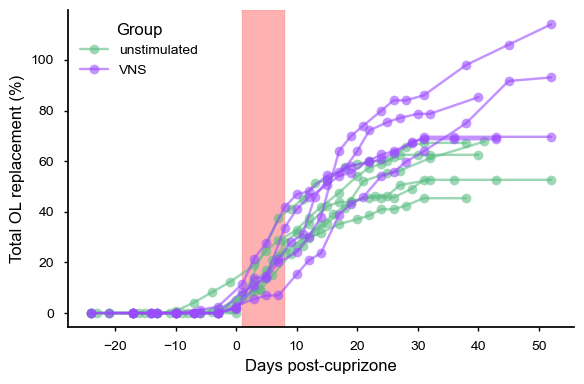

In [2]:
def plot_animal_trajectories(df, palette, id_col='ID', behavior_col='Behavior',\
                             x_col='DaysSinceCup', y_col='Total OL Replacement %'):
    """
    Plots individual animal trajectories from a dataframe.
    Automatically removes rows where 'Behavior' (or other critical data) is missing.
    """
    
    # 1. Internal Data Cleaning
    original_count = len(df)
    
    # Drop rows where critical info is missing
    plot_data = df.dropna(subset=[id_col, behavior_col, x_col, y_col]).copy()
    
    # Report cleanup results if necessary
    dropped_count = original_count - len(plot_data)
    if dropped_count > 0:
        print(f"Data Cleanup: Dropped {dropped_count} rows containing NaNs.")

    if plot_data.empty:
        print(f"Warning: Dataframe is empty after cleaning. Check your column names or data.")
        return

    # 2. Calculate and Print N per Group
    # Group by behavior and count unique IDs
    group_counts = plot_data.groupby(behavior_col)[id_col].nunique()
    
    print("-" * 30)
    print(f"Sample Sizes (N) for")
    for group, count in group_counts.items():
        # Clean up the group name for printing
        clean_group = str(group).strip()
        print(f"  - {clean_group}: {count} animals")
    print("-" * 30)
   
    # Get unique animals from the CLEAN data only
    animals = plot_data[id_col].unique()

    # 3. Setup Plot
    plt.figure(figsize=(6, 4))
    ax = plt.gca()
    
    # 4. Plot Loop
    for animal_id in animals:
        animal_subset = plot_data[plot_data[id_col] == animal_id].sort_values(x_col)
        
        if animal_subset.empty:
            continue
            
        group_val = animal_subset[behavior_col].iloc[0]
        group = str(group_val).strip()
        color = palette.get(group, 'gray')
        
        plt.plot(animal_subset[x_col], 
                 animal_subset[y_col], 
                 marker='o', 
                 linestyle='-', 
                 alpha=0.6, 
                 color=color, 
                 label=group)

    # 5. Formatting
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title="Group")
    
    plt.xlabel('Days post-cuprizone')
    plt.ylabel("Total OL replacement (%)")
    npl.epochplot(nel.EpochArray([[1,8]]),color='red',alpha=0.3)
    npl.utils.clear_right(ax)
    npl.utils.clear_top(ax)
    
    plt.tight_layout()
    plt.show()
my_palette = {'VNS': '#9b4bffff', 'unstimulated': '#5dbd84ff'}
plot_animal_trajectories(df_fig1, my_palette, )

<div class="alert alert-block alert-info">
    <b>Methodological Note: Longitudinal Imaging Trajectories</b><br>
    To quantify oligodendrocyte dynamics, we performed longitudinal <i>in vivo</i> two-photon imaging at multiple time points post-cuprizone.
    <ul>
        <li><b>Temporal Variability:</b> Exact imaging dates and total duration varied between animals due to experimental constraints, specifically the visibility of cranial window clarity over the observation period causes some mice to not be imaged as long.</li>
        <li><b>Metric:</b> We calculated <b>Total OL Replacement %</b> at each available time point. This metric allows for the assessment of regeneration trajectories despite the heterogeneity in sampling intervals.</li>
    </ul>
</div>

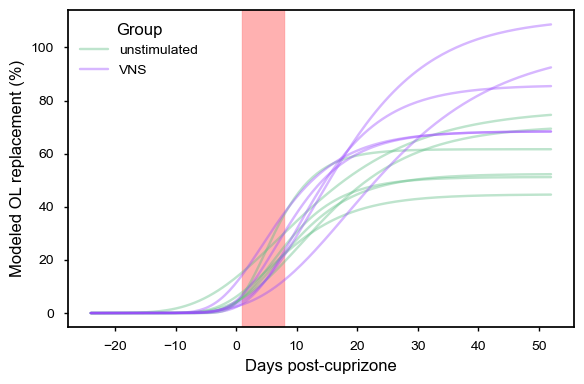

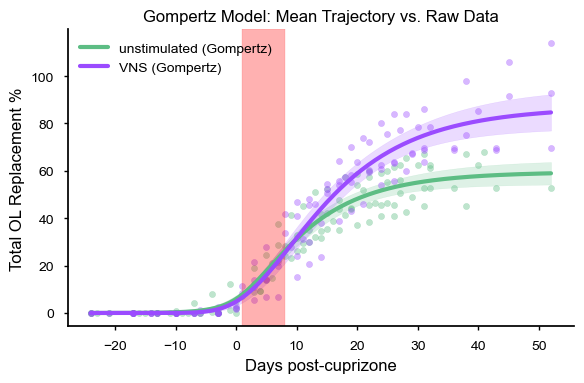

GOMPERTZ PARAMETER STATISTICS
Hypothesis: Is VNS > unstimulated?

Metric: Theoretical Max Replacement (%) [Asymptote_a]
  VNS: 86.99 ± 8.59
  unstimulated: 59.59 ± 5.07
  Difference: +27.40
----------------------------------------
  Two-Sided: p=0.0187 [*]
  One-Sided: p=0.0093 [**]
................................................................................

Metric: Time of Peak Growth (Days) [Inflection_Point]
  VNS: 10.43 ± 2.47
  unstimulated: 6.75 ± 0.87
  Difference: +3.68
----------------------------------------
  Two-Sided: p=0.1627 [n.s.]
  One-Sided: p=0.0814 [n.s.]
................................................................................

Metric: Growth Rate Constant (c) [Rate_c]
  VNS: 0.12 ± 0.01
  unstimulated: 0.14 ± 0.02
  Difference: -0.02
----------------------------------------
  Two-Sided: p=0.4688 [n.s.]
  One-Sided: p=0.7656 [n.s.]
................................................................................
Fitting Group Templates (Pooled Data)...
G

,ID,Group,RMSE_Overall,RMSE_Early,RMSE_Middle,RMSE_Late
0,MOBP61,unstimulated,8.491837,2.453506,12.732574,8.584114
1,MOBP72,unstimulated,3.441403,0.894099,2.223661,4.826859
2,MOBP76,unstimulated,7.355261,1.200695,4.481986,11.210911
3,MOBP77,unstimulated,6.315817,4.189622,4.674059,8.542020
4,MOBP87,unstimulated,3.394691,1.729710,3.841452,4.334044
5,MOBP127,unstimulated,4.702710,0.517691,5.882202,5.610539
6,MOBP48,VNS,10.862578,1.859385,14.491914,11.467632
7,MOBP55,VNS,11.371677,2.118407,4.850927,16.360978
8,MOBP60,VNS,4.332051,2.077192,4.234010,5.651283
9,MOBP69,VNS,8.665949,0.177670,11.617662,8.844713


In [14]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import math

def calculate_aic(n, rss, k):
    """Calculate AIC: n * log(RSS/n) + 2k"""
    if n <= 0 or rss <= 0: return np.inf
    return n * np.log(rss / n) + 2 * k

# -----------------------------------------------------------------------------
# 1. GOMPERTZ MODEL
# -----------------------------------------------------------------------------
def gompertz(t, a, b, c):
    """
    Gompertz growth model.
    a: Asymptote (theoretical maximum)
    b: Displacement (shifts curve along x-axis)
    c: Growth rate
    """
    return a * np.exp(-b * np.exp(-c * t))

# -----------------------------------------------------------------------------
# 2. FIT AND PLOT (Returns Individual Params)
# -----------------------------------------------------------------------------
def plot_gompertz_fits(df, palette, id_col='ID', behavior_col='Behavior', plot_individual=False,\
                       x_col='DaysSinceCup', y_col='Total OL Replacement %'):
    """
    Fits a Gompertz curve to each animal individually and plots the SMOOTH modeled trajectory.
    Returns a DataFrame containing the fitted parameters for every animal.
    """
    original_count = len(df)
    plot_data = df.dropna(subset=[id_col, behavior_col, x_col, y_col]).copy()
    
    if plot_data.empty:
        print("Warning: Dataframe is empty after cleaning.")
        return pd.DataFrame() 
    
    fitted_params = []
    animals = plot_data[id_col].unique()
    
    x_min = plot_data[x_col].min()
    x_max = plot_data[x_col].max()
    x_smooth = np.linspace(x_min, x_max, 200)

    # --- SETUP PLOTTING ---
    if plot_individual:
        n_mice = len(animals)
        n_cols = 4
        n_rows = math.ceil(n_mice / n_cols)
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3), constrained_layout=True)
        try: axes = axes.flatten()
        except: axes = [axes] # Handle single plot case
    else:
        # Standard Aggregate Plot
        plt.figure(figsize=(6, 4))
    
    ax = plt.gca()

    for i, animal_id in enumerate(animals):
        animal_subset = plot_data[plot_data[id_col] == animal_id].sort_values(x_col)
        
        if len(animal_subset) < 3:
            print(f"Skipping {animal_id}: Not enough data points to fit.")
            continue
            
        x_raw = animal_subset[x_col].values
        y_raw = animal_subset[y_col].values

        n_points = len(x_raw)
        
        group_val = animal_subset[behavior_col].iloc[0]
        group = str(group_val).strip()
        color = palette.get(group, 'gray')
        
        try:
            p0 = [max(y_raw), 10, 0.1]
            bounds = ([0, 0, 0], [np.inf, np.inf, np.inf])
            popt, pcov = curve_fit(gompertz, x_raw, y_raw, p0=p0, bounds=bounds, maxfev=10000)

            # CALC R^2
            y_pred = gompertz(x_raw, *popt)
            ss_res = np.sum((y_raw - y_pred)**2)
            ss_tot = np.sum((y_raw - np.mean(y_raw))**2)
            r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0.0

            # AIC (k=3 parameters for Gompertz)
            aic_score = calculate_aic(n_points, ss_res, k=3)

            if plot_individual:
                ax_curr = axes[i]
                y_smooth = gompertz(x_smooth, *popt)
                
                # Plot Raw Data
                ax_curr.scatter(x_raw, y_raw, color=color, s=30, alpha=0.7)
                # Plot Fit
                ax_curr.plot(x_smooth, y_smooth, linestyle='--', color=color, linewidth=2)
                # Add Text
                stats_text = f'$R^2$={r_squared:.3f}\nAIC={aic_score:.1f}'
                ax_curr.text(0.05, 0.85, stats_text, 
                             transform=ax_curr.transAxes, fontsize=11, 
                             verticalalignment='top')
                ax_curr.set_title(f"{animal_id}", fontsize=10, fontweight='bold')
            else:
                y_smooth = gompertz(x_smooth, *popt)
                plt.plot(x_smooth, y_smooth, linestyle='-', alpha=0.4, color=color, label=group)
            
            fitted_params.append({
                'ID': animal_id,
                'Group': group,
                'Asymptote_a': popt[0],
                'Displacement_b': popt[1],
                'Rate_c': popt[2]
            })
            
        except RuntimeError:
            print(f"Fit failed for animal {animal_id}")

    if plot_individual:
        for j in range (i+1, len(axes)): 
            axes[j].axis('off')
        plt.show()
    else:

        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), title="Group")
        
        plt.xlabel('Days post-cuprizone')
        plt.ylabel("Modeled OL replacement (%)") 
        npl.epochplot(nel.EpochArray([[1,8]]), color='red', alpha=0.3)

        plt.tight_layout()
        plt.show()
    
    return pd.DataFrame(fitted_params)

# -----------------------------------------------------------------------------
# 3. STATS ON PARAMETERS (Inflection Point, Asymptote)
# -----------------------------------------------------------------------------
def analyze_gompertz_stats(df_results, target_greater_group=None):
    """
    Calculates Inflection Point and performs T-tests on parameters.
    """
    df_results['Inflection_Point'] = np.log(df_results['Displacement_b']) / df_results['Rate_c']
    groups = df_results['Group'].unique()
    
    if len(groups) != 2:
        print(f"Error: Statistics require exactly 2 groups. Found {len(groups)}.")
        return
    
    if target_greater_group and target_greater_group in groups:
        group1_name = target_greater_group
        group2_name = [g for g in groups if g != target_greater_group][0]
    else:
        group1_name, group2_name = groups[0], groups[1]
    
    g1_data = df_results[df_results['Group'] == group1_name]
    g2_data = df_results[df_results['Group'] == group2_name]
    
    print("="*80)
    print(f"GOMPERTZ PARAMETER STATISTICS")
    print(f"Hypothesis: Is {group1_name} > {group2_name}?")
    print("="*80)
    
    metrics = {
        'Asymptote_a': 'Theoretical Max Replacement (%)',
        'Inflection_Point': 'Time of Peak Growth (Days)',
        'Rate_c': 'Growth Rate Constant (c)'
    }
    
    for param, desc in metrics.items():
        vals1 = g1_data[param]
        vals2 = g2_data[param]
        
        t_2side, p_2side = stats.ttest_ind(vals1, vals2, equal_var=True, alternative='two-sided')
        t_1side, p_1side = stats.ttest_ind(vals1, vals2, equal_var=True, alternative='greater')
        
        def get_stars(p):
            if p < 0.001: return "***"
            if p < 0.01: return "**"
            if p < 0.05: return "*"
            return "n.s."

        print(f"\nMetric: {desc} [{param}]")
        print(f"  {group1_name}: {vals1.mean():.2f} ± {vals1.sem():.2f}")
        print(f"  {group2_name}: {vals2.mean():.2f} ± {vals2.sem():.2f}")
        print(f"  Difference: {vals1.mean() - vals2.mean():+.2f}")
        print("-" * 40)
        print(f"  Two-Sided: p={p_2side:.4f} [{get_stars(p_2side)}]")
        print(f"  One-Sided: p={p_1side:.4f} [{get_stars(p_1side)}]")
        print("." * 80)

# -----------------------------------------------------------------------------
# 4. EVALUATE GOODNESS OF FIT (GROUP TEMPLATE RMSE)
# -----------------------------------------------------------------------------
def run_metric_permutation_test(df, metric_col, group_col, n_perm=1000):
    groups = df[group_col].unique()
    if len(groups) != 2: return np.nan
    
    g1 = df[df[group_col] == groups[0]][metric_col].dropna().values
    g2 = df[df[group_col] == groups[1]][metric_col].dropna().values
    
    if len(g1) == 0 or len(g2) == 0: return np.nan
    
    obs_diff = np.abs(np.mean(g1) - np.mean(g2))
    pooled = np.concatenate([g1, g2])
    n1 = len(g1)
    
    null_diffs = []
    for _ in range(n_perm):
        np.random.shuffle(pooled)
        p1 = pooled[:n1]
        p2 = pooled[n1:]
        null_diffs.append(np.abs(np.mean(p1) - np.mean(p2)))
        
    return (np.sum(np.array(null_diffs) >= obs_diff) + 1) / (n_perm + 1)

def evaluate_gompertz_fit(df_raw, df_params, id_col='ID', 
                          x_col='DaysSinceCup', y_col='Total OL Replacement %'):
    """
    Calculates RMSE for 4 phases by comparing each animal's data against its GROUP TEMPLATE.
    Runs permutation tests to compare fit quality (RMSE) between groups.
    """
    
    # 1. Fit Group Templates first
    print("Fitting Group Templates (Pooled Data)...")
    templates = {}
    groups = df_params['Group'].unique()
    
    for group in groups:
        subset = df_raw.dropna(subset=[x_col, y_col])
        group_ids = df_params[df_params['Group'] == group][id_col].values
        subset = subset[subset[id_col].isin(group_ids)]
        
        x_all = subset[x_col].values
        y_all = subset[y_col].values
        
        try:
            p0 = [max(y_all), 10, 0.1]
            bounds = ([0, 0, 0], [np.inf, np.inf, np.inf])
            popt, _ = curve_fit(gompertz, x_all, y_all, p0=p0, bounds=bounds, maxfev=10000)
            templates[group] = popt
        except:
            print(f"Warning: Could not fit Group Template for {group}")
            templates[group] = [np.nan, np.nan, np.nan]

    metrics_list = []
    
    phases = [
        ('Overall', lambda x: np.full(x.shape, True, dtype=bool)),
        ('Early',   lambda x: x <= 0),
        ('Middle',  lambda x: (x > 0) & (x <= 15)),
        ('Late',    lambda x: x > 15)
    ]
    
    for index, row in df_params.iterrows():
        animal_id = row[id_col]
        group = row['Group']
        
        animal_data = df_raw[df_raw[id_col] == animal_id].dropna(subset=[x_col, y_col])
        if animal_data.empty: continue
            
        x_obs = animal_data[x_col].values
        y_obs = animal_data[y_col].values
        
        # USE GROUP TEMPLATE PARAMETERS
        if group in templates and not np.isnan(templates[group][0]):
            a, b, c = templates[group]
            y_pred = gompertz(x_obs, a, b, c)
        else:
            y_pred = np.full_like(x_obs, np.nan)
        
        row_metrics = {id_col: animal_id, 'Group': group}
        
        for phase_name, condition in phases:
            mask = condition(x_obs)
            if np.sum(mask) > 0 and not np.isnan(y_pred).all():
                rmse = np.sqrt(mean_squared_error(y_obs[mask], y_pred[mask]))
            else:
                rmse = np.nan
                
            row_metrics[f'RMSE_{phase_name}'] = rmse
            
        metrics_list.append(row_metrics)
        
    df_metrics = pd.DataFrame(metrics_list)
    
    # --- REPORTING ---
    print("="*90)
    print("GOMPERTZ GROUP TEMPLATE EVALUATION")
    print("Comparing deviation (RMSE) of individuals from the Group S-Curve")
    print("="*90)
    
    metric_cols = [c for c in df_metrics.columns if 'RMSE' in c]
    if len(groups) == 2:
        print(f"{'Metric':<18} | {groups[0]:<12} | {groups[1]:<12} | {'Diff':<8} | {'P-Value':<8}")
        print("-" * 90)
        for metric in metric_cols:
            p_val = run_metric_permutation_test(df_metrics, metric, 'Group')
            g1_mean = df_metrics[df_metrics['Group'] == groups[0]][metric].mean()
            g2_mean = df_metrics[df_metrics['Group'] == groups[1]][metric].mean()
            diff = g1_mean - g2_mean
            sig = "*" if p_val < 0.05 else "n.s."
            if p_val < 0.01: sig = "**"
            print(f"{metric:<18} | {g1_mean:>9.2f}    | {g2_mean:>9.2f}    | {diff:>+6.2f}   | {p_val:.4f} {sig}")
            
    print("-" * 90)
    print("INTERPRETATION: Significantly higher RMSE indicates the Group S-Curve fails to capture individual behavior.")
    return df_metrics

# -----------------------------------------------------------------------------
# GOMPERTZ VISUALIZATION (Mean +/- SEM)
# -----------------------------------------------------------------------------
def plot_gompertz_mean_with_sem(df_raw, df_params, palette, 
                                id_col='ID', group_col='Behavior', 
                                x_col='DaysSinceCup', y_col='Total OL Replacement %'):
    """
    Plots the MEAN Gompertz trajectory +/- SEM for each group.
    This effectively visualizes the "Average Model" vs. the "Raw Data".
    """
    
    # Setup Plot
    plt.figure(figsize=(6, 4))
    ax = plt.gca()
    
    # Define common grid for averaging
    x_min = df_raw[x_col].min()
    x_max = df_raw[x_col].max()
    x_grid = np.linspace(x_min, x_max, 200)
    
    groups = df_params['Group'].unique()
    max_y = 0
    
    for group in groups:
        color = palette.get(str(group).strip(), 'gray')
        
        # Get parameters for all animals in this group
        group_params = df_params[df_params['Group'] == group]
        
        # 1. Generate curves for EVERY animal on the common grid
        individual_curves = []
        
        for _, row in group_params.iterrows():
            a, b, c = row['Asymptote_a'], row['Displacement_b'], row['Rate_c']
            
            # Predict on grid
            y_pred = gompertz(x_grid, a, b, c)
            individual_curves.append(y_pred)
            
        if not individual_curves: continue
        
        # 2. Calculate Mean and SEM across the population of curves
        curve_array = np.array(individual_curves)
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            mean_curve = np.nanmean(curve_array, axis=0)
            sem_curve = stats.sem(curve_array, axis=0)
            
        # 3. Plot the Model (Line + Ribbon)
        plt.plot(x_grid, mean_curve, color=color, linewidth=3, label=f"{group} (Gompertz)")
        plt.fill_between(x_grid, 
                         mean_curve - sem_curve, 
                         mean_curve + sem_curve, 
                         color=color, alpha=0.2)
        
        # 4. Plot the Raw Data
        # We need to map the group name back to the raw dataframe's group column
        # Assuming direct string match or stripping
        subset_raw = df_raw.dropna(subset=[group_col])
        subset_raw = subset_raw[subset_raw[group_col].astype(str).str.strip() == str(group).strip()]
        
        plt.scatter(subset_raw[x_col], subset_raw[y_col], color=color, alpha=0.4, s=20)
        
        if not subset_raw.empty:
            current_max = subset_raw[y_col].max()
            if current_max > max_y: max_y = current_max

    # Formatting
    npl.epochplot(nel.EpochArray([[1,8]]), color='red', alpha=0.3)
    npl.utils.clear_right(ax)
    npl.utils.clear_top(ax)
    
    plt.title("Gompertz Model: Mean Trajectory vs. Raw Data")
    plt.xlabel("Days post-cuprizone")
    plt.ylabel(y_col)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
df_results_fig1 = plot_gompertz_fits(df_fig1, palette={'VNS': '#9b4bffff', 'unstimulated': '#5dbd84ff'})
plot_gompertz_mean_with_sem(df_fig1, df_results_fig1, 
                            palette={'VNS': '#9b4bffff', 'unstimulated': '#5dbd84ff'})
analyze_gompertz_stats(df_results_fig1, target_greater_group="VNS")
evaluate_gompertz_fit(df_fig1, df_results_fig1)

<div class="alert alert-block alert-success">
    <b>Statistical Insight: VNS Enhances Regenerative Capacity</b><br>
    Modeling oligodendrocyte dynamics with a Gompertz growth function reveals a significant long-term benefit of VNS:
    <ul>
        <li><b>Higher Theoretical Maximum:</b> VNS-treated animals exhibited a significantly higher asymptotic limit for oligodendrocyte replacement (<b>86.99% ± 8.59%</b>) compared to unstimulated controls (<b>59.59% ± 5.07%</b>; <i>p = 0.0187</i>). This suggests VNS expands the "ceiling" for repair.</li>
        <li><b>Similar Kinetics:</b> The rate of growth (<i>Rate c</i>) and the time of peak regeneration (<i>Inflection Point</i>) were not significantly different between groups (<i>p > 0.05</i>), indicating that VNS scales the magnitude of repair without fundamentally altering its temporal onset.</li>
    </ul>
</div>

<div class="alert alert-block alert-danger">
    <b>Model Validation: Lack of Goodness-of-Fit</b><br>
    While the parameter comparison suggests a treatment effect, a deeper evaluation of the model's fit reveals critical limitations:
    <ul>
        <li><b>High Residual Error:</b> The Root Mean Square Error (RMSE) for both groups is substantial (Unstimulated: 5.62, VNS: 8.26), indicating that individual animal trajectories deviate considerably from the group-level "S-curve."</li>
        <li><b>Failure to Capture Complexity:</b> The non-significant difference in RMSE between groups (<i>p = 0.1429</i>) suggests the model performs equally poorly for both. The high late-phase error (RMSE > 7) implies that a simple asymptotic growth model fails to capture the complex, potentially multiphasic dynamics of long-term remyelination observed in this dataset.</li>
    </ul>
    <b>Conclusion:</b> A more flexible, non-parametric approach may be required to accurately characterize the distinct phases of repair.
</div>

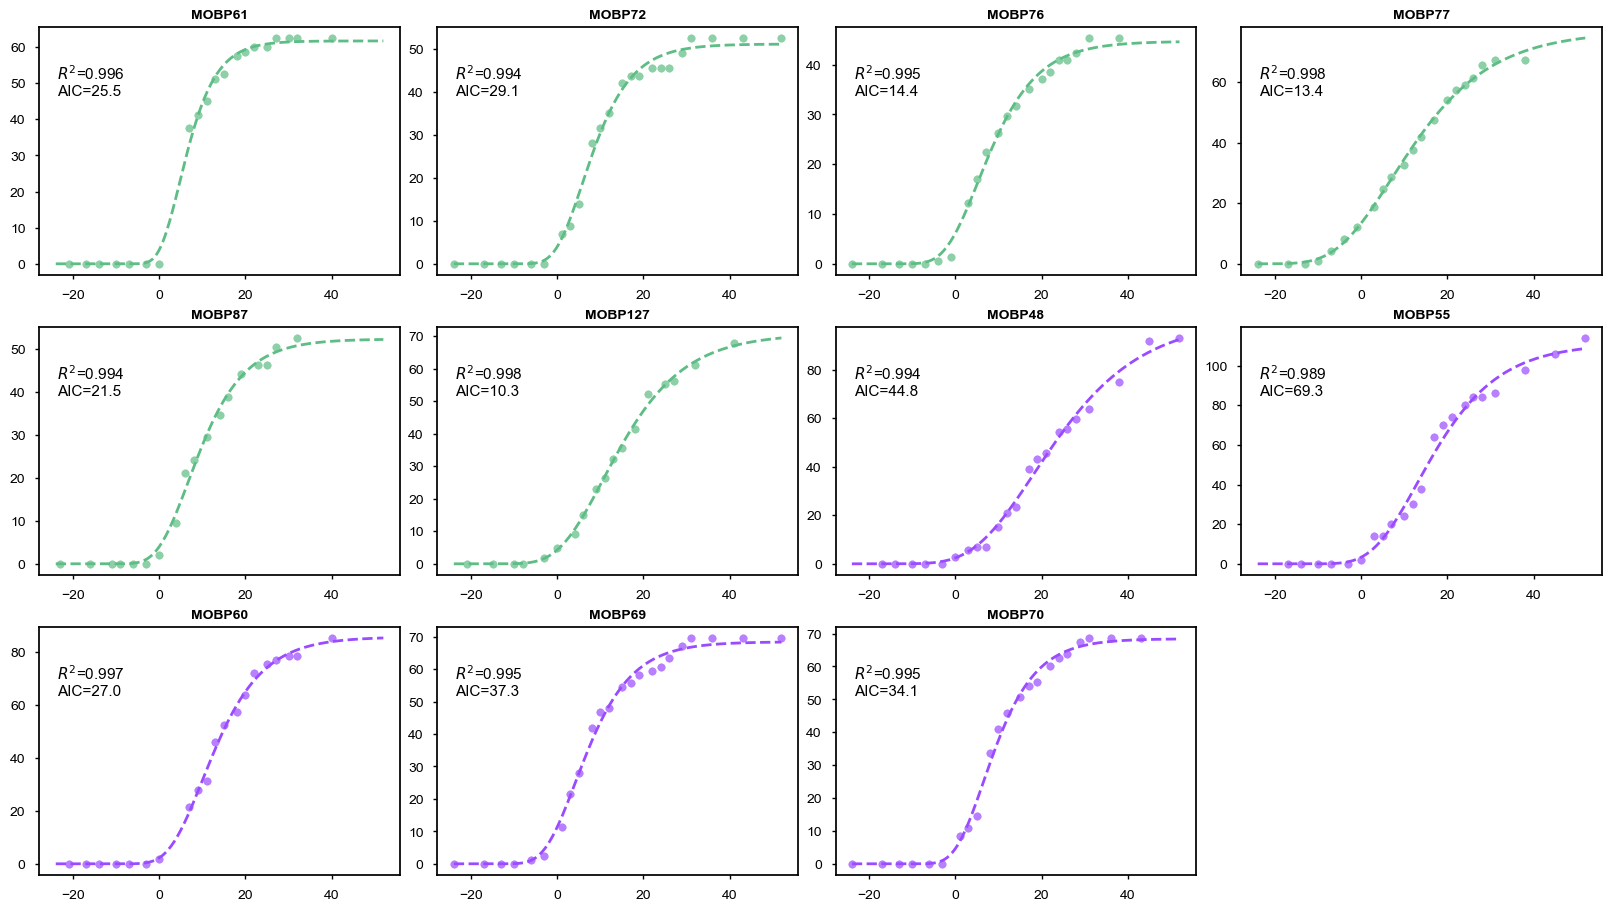

In [6]:
df_results_fig1 = plot_gompertz_fits(df_fig1, palette={'VNS': '#9b4bffff', 'unstimulated': '#5dbd84ff'},plot_individual=True)

<div class="alert alert-block alert-info">
    <b>Methodological Caveat: High $R^2$ Does Not Imply Model Validity</b><br>
    In our analysis, the Gompertz model yielded $R^2$ values consistently exceeding <b>0.97</b>. However, a high $R^2$ is not sufficient proof that the chosen model (S-curve) is the correct structural fit for the biological process. The following proof-of-concept demonstrates how a Gompertz curve can "force-fit" fundamentally linear data while still producing a near-perfect $R^2$ score.
</div>

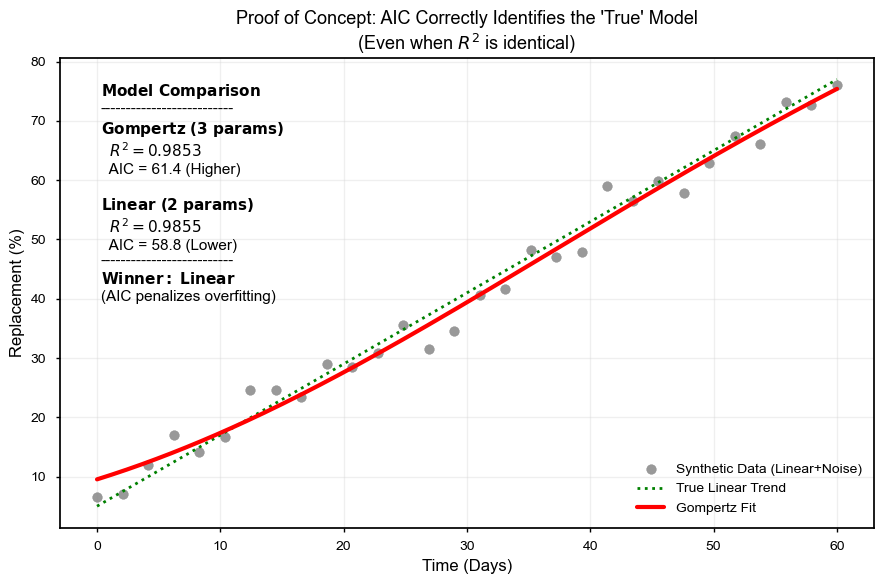

In [7]:
from sklearn.metrics import r2_score
# --- 2. Generate Synthetic LINEAR Data ---
def linear(t, m, c):
    """2-Parameter Linear Model"""
    return m * t + c

def calculate_aic(n, rss, k):
    """Calculate AIC: n * log(RSS/n) + 2k"""
    if n <= 0 or rss <= 0: return np.inf
    return n * np.log(rss / n) + 2 * k

# --- 2. Generate Synthetic LINEAR Data ---
np.random.seed(42) # for reproducible results
x_syn = np.linspace(0, 60, 30)

# Define underlying linear trend (y = mx + c)
true_slope = 1.2
true_intercept = 5
y_linear_true = true_slope * x_syn + true_intercept

# Add random noise to simulate real biological data
noise_level = 3.0
y_syn_noisy = y_linear_true + np.random.normal(0, noise_level, len(x_syn))

# --- 3. Fit Models & Calculate Metrics ---

# A. Fit Gompertz (3 params)
# Generous bounds to allow it to mimic a line
p0_g = [max(y_syn_noisy)*2, 10, 0.05]
bounds_g = ([0, 0, 0], [np.inf, np.inf, np.inf])

try:
    popt_g, _ = curve_fit(gompertz, x_syn, y_syn_noisy, p0=p0_g, bounds=bounds_g, maxfev=50000)
    y_pred_g = gompertz(x_syn, *popt_g)
    
    # Metrics
    r2_g = r2_score(y_syn_noisy, y_pred_g)
    rss_g = np.sum((y_syn_noisy - y_pred_g)**2)
    aic_g = calculate_aic(len(x_syn), rss_g, 3) # k=3 parameters
    status_g = "Success"
except:
    status_g = "Failed"
    aic_g = np.inf

# B. Fit Linear (2 params)
try:
    popt_l, _ = curve_fit(linear, x_syn, y_syn_noisy)
    y_pred_l = linear(x_syn, *popt_l)
    
    # Metrics
    r2_l = r2_score(y_syn_noisy, y_pred_l)
    rss_l = np.sum((y_syn_noisy - y_pred_l)**2)
    aic_l = calculate_aic(len(x_syn), rss_l, 2) # k=2 parameters
except:
    aic_l = np.inf

# --- 4. Visualize the Comparison ---
plt.figure(figsize=(9, 6))

# Plot Data
plt.scatter(x_syn, y_syn_noisy, color='gray', alpha=0.8, label='Synthetic Data (Linear+Noise)')
plt.plot(x_syn, y_linear_true, color='green', linestyle=':', linewidth=2, label='True Linear Trend')

if status_g == "Success":
    # Plot Gompertz Fit
    x_smooth = np.linspace(0, 60, 200)
    plt.plot(x_smooth, gompertz(x_smooth, *popt_g), color='red', linewidth=3, label='Gompertz Fit')
    
    # Determine Winner
    winner = "Linear" if aic_l < aic_g else "Gompertz"
    
    # Text Box with Stats Comparison
    textstr = '\n'.join((
        r'$\bf{Model\ Comparison}$',
        r'--------------------------',
        r'$\bf{Gompertz\ (3\ params)}$',
        r'  $R^2 = %.4f$' % (r2_g, ),
        r'  AIC = %.1f (Higher)' % (aic_g, ),
        r'',
        r'$\bf{Linear\ (2\ params)}$',
        r'  $R^2 = %.4f$' % (r2_l, ),
        r'  AIC = %.1f (Lower)' % (aic_l, ),
        r'--------------------------',
        r'$\bf{Winner:\ %s}$' % (winner, ),
        r'(AIC penalizes overfitting)'
    ))
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=11,
            verticalalignment='top')

else:
    plt.title("Gompertz Fit Failed")

plt.title("Proof of Concept: AIC Correctly Identifies the 'True' Model\n(Even when $R^2$ is identical)", fontsize=13)
plt.xlabel("Time (Days)")
plt.ylabel("Replacement (%)")
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
    <b>Statistical Critique: The $R^2$ Paradox</b><br>
    The simulation above highlights the critical danger of relying on $R^2$ for model selection:
    <ol>
        <li><b>The Ground Truth:</b> The data is undeniably linear (generated via <i>y = mx + c</i>).</li>
        <li><b>The Mimicry:</b> The Gompertz model (red solid line) fits the data "perfectly" by mathematically stretching out the rising phase of its S-curve.</li>
        <li><b>The Result:</b> $R^2$ is extremely high (<b>0.9853</b>), falsely implying a perfect model fit.</li>
    </ol>
    <b>Conclusion:</b> $R^2$ only confirms that the curve passes near the data points; it does not validate the underlying structural assumptions. This aligns with the methodological warnings in <i>Thornton et al.</i> (Ref 88, Nature Neuroscience), which caution against using goodness-of-fit measures alone. The decision to prioritize $R^2$ in their Extended Data Figure 8, despite this known limitation, represents a methodological divergence that warrants further clarification with the authors unless I'm missing something. I may have missed an explanation in the text as I was primarily just looking at the figures. 
</div>

<div class="alert alert-block alert-info">
    <b>Hypothesis Confirmation: Directional Consistency</b><br>
    Practically, the core question is whether VNS enhances regeneration. The Gompertz model (in our biorxiv submission) suggested that VNS-treated animals achieve a significantly higher asymptotic limit for oligodendrocyte replacement.
    <br><br>
    <b>The Question:</b> What if we test this hypothesis in a <b>non-parametric manner</b>, without forcing the data to fit a specific mathematical curve?
    <br><br>
    <b>Prediction:</b> If the effect is robust, a model-free analysis (e.g., Mann-Whitney U on empirical maxima) should confirm that VNS drives significantly greater replacement than unstimulated controls, validating the finding independent of model choice.
</div>

NON-PARAMETRIC ROBUSTNESS CHECK (Mann-Whitney U)
Hypothesis Direction: Is VNS > Control?

Metric: Max_Value (per animal)
  VNS (Target): 86.12 ± 8.37 (n=5)
  unstimulated (Control): 58.02 ± 3.73 (n=6)
----------------------------------------
  Two-Sided Mann-Whitney: U=30.0, p=0.0080 [**]
  One-Sided Mann-Whitney: U=30.0, p=0.0040 [**] (Testing VNS > unstimulated)
................................................................................

Metric: AUC (per animal)
  VNS (Target): 40.22 ± 3.37 (n=5)
  unstimulated (Control): 26.87 ± 2.19 (n=6)
----------------------------------------
  Two-Sided Mann-Whitney: U=30.0, p=0.0043 [**]
  One-Sided Mann-Whitney: U=30.0, p=0.0022 [**] (Testing VNS > unstimulated)
................................................................................

LOESS SMOOTHING DETAILS (Target Window: ~21 Days)
Group 'unstimulated': Duration=76.0d -> using frac=0.28
Group 'VNS': Duration=76.0d -> using frac=0.28


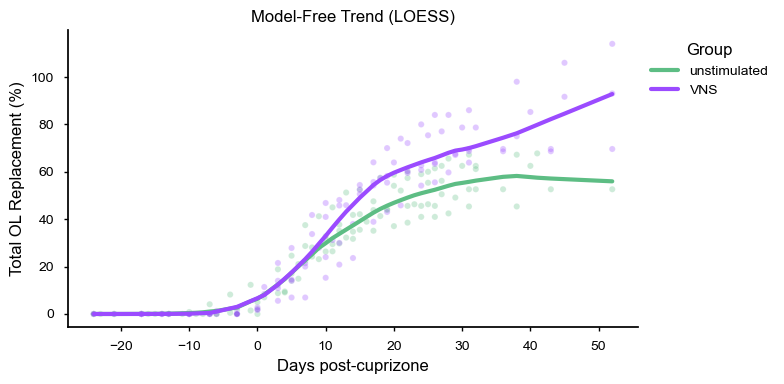

In [9]:
from scipy import stats, integrate
import statsmodels.api as sm
    
def analyze_non_parametric(df, palette, target_greater_group=None,
                           smoothing_window_days=7,\
                           id_col='ID', group_col='Behavior',\
                           x_col='DaysSinceCup', y_col='Total OL Replacement %'):
    """
    Performs model-free validation:
    1. Calculates Max Observed Value & AUC per animal.
    2. Runs Mann-Whitney U Tests (Two-Sided AND One-Sided).
    3. Plots CUSTOM LOESS curves (Physics-Constrained + Tunable Window).
    
    Args:
        target_greater_group (str): The name of the group you hypothesize is LARGER.
                                    (e.g., 'VNS').
        smoothing_window_days (int): The size of the smoothing window in X-axis units (Days).
                                     Larger = smoother line (less detail).
                                     Smaller = wigglier line (more noise).
    """
    
    # 1. CLEAN DATA
    df_clean = df.dropna(subset=[id_col, group_col, x_col, y_col]).copy()
    metrics_list = []
    
    # 2. CALCULATE SUMMARY METRICS (Per Animal)
    animals = df_clean[id_col].unique()
    
    for animal in animals:
        subset = df_clean[df_clean[id_col] == animal].sort_values(x_col)
        
        if len(subset) < 2: 
            continue # Need points to make a curve
            
        x = subset[x_col].values
        y = subset[y_col].values
        
        # Metric A: Max Observed Value (The empirical ceiling)
        max_val = np.max(y)
        
        # Metric B: AUC (Area Under Curve) - Normalized by duration
        # This represents "Total Exposure" to replacement over the experiment
        duration = x[-1] - x[0]
        if duration > 0:
            # Trapz calculates area using trapezoids connecting the dots
            auc = integrate.trapezoid(y, x) / duration
        else:
            auc = 0
            
        metrics_list.append({
            'ID': animal,
            'Group': str(subset[group_col].iloc[0]).strip(), # strip whitespace
            'Max_Value': max_val,
            'AUC': auc
        })
        
    df_metrics = pd.DataFrame(metrics_list)
    
    # 3. STATISTICAL REPORT
    print("="*80)
    print("NON-PARAMETRIC ROBUSTNESS CHECK (Mann-Whitney U)")
    if target_greater_group:
        print(f"Hypothesis Direction: Is {target_greater_group} > Control?")
    else:
        print("Hypothesis: Two-Sided (Any Difference)")
    print("="*80)
    
    groups = df_metrics['Group'].unique()
    if len(groups) != 2:
        print(f"Error: Need exactly 2 groups. Found: {groups}")
        return
    
    # Identify Target vs Control
    if target_greater_group:
        if target_greater_group not in groups:
             print(f"Error: target_greater_group '{target_greater_group}' not found. Available: {groups}")
             return
        g1_name = target_greater_group
        g2_name = [g for g in groups if g != target_greater_group][0]
    else:
        g1_name, g2_name = groups[0], groups[1]

    g1 = df_metrics[df_metrics['Group'] == g1_name]
    g2 = df_metrics[df_metrics['Group'] == g2_name]
    
    # Helper for stars
    def get_stars(p):
        if p < 0.001: return "***"
        if p < 0.01:  return "**"
        if p < 0.05:  return "*"
        return "n.s."

    # Test both metrics
    for metric in ['Max_Value', 'AUC']:
        # 1. Two-Sided Test
        u_2, p_2 = stats.mannwhitneyu(g1[metric], g2[metric], alternative='two-sided')
        
        # 2. One-Sided Test (Greater)
        u_1, p_1 = stats.mannwhitneyu(g1[metric], g2[metric], alternative='greater')
        
        mean1, se1 = g1[metric].mean(), g1[metric].sem()
        mean2, se2 = g2[metric].mean(), g2[metric].sem()
        
        stars_2 = get_stars(p_2)
        stars_1 = get_stars(p_1)
        
        print(f"\nMetric: {metric} (per animal)")
        print(f"  {g1_name} (Target): {mean1:.2f} ± {se1:.2f} (n={len(g1)})")
        print(f"  {g2_name} (Control): {mean2:.2f} ± {se2:.2f} (n={len(g2)})")
        print("-" * 40)
        print(f"  Two-Sided Mann-Whitney: U={u_2}, p={p_2:.4f} [{stars_2}]")
        print(f"  One-Sided Mann-Whitney: U={u_1}, p={p_1:.4f} [{stars_1}] (Testing {g1_name} > {g2_name})")
        print("." * 80)

    # 4. VISUALIZATION: LOESS PLOT
    plt.figure(figsize=(8, 4))
    ax = plt.gca()
    
    # A. Plot Raw Data (Faint background dots)
    sns.scatterplot(data=df_clean, x=x_col, y=y_col, hue=group_col, palette=palette, 
                    alpha=0.3, s=20, legend=False)
    # B. Plot Smooth Lines (Manual Calculation)
    print("\n" + "="*60)
    print(f"LOESS SMOOTHING DETAILS (Target Window: ~{smoothing_window_days} Days)")
    print("="*60)

    for group in groups:
        subset = df_clean[df_clean[group_col] == group].sort_values(x_col)
        if subset.empty: continue
            
        x_vals = subset[x_col].values
        y_vals = subset[y_col].values
        color = palette.get(str(group).strip(), 'gray')
        
        # --- DYNAMIC FRACTION CALCULATION ---
        # Convert "Days" into the "Fraction" that statsmodels requires
        duration = x_vals.max() - x_vals.min()
        if duration > 0:
            frac = smoothing_window_days / duration
        else:
            frac = 0.3
        
        # Keep frac within safe bounds (0.05 to 1.0)
        frac = max(0.05, min(1.0, frac))
        
        # --- MANUAL LOESS CALCULATION ---
        # Calculate the smooth curve
        lowess = sm.nonparametric.lowess(y_vals, x_vals, frac=frac)
        lowess_x = lowess[:, 0]
        lowess_y = lowess[:, 1]
        
        # --- THE FIX: CLAMP NEGATIVE VALUES ---
        # Force the curve to respect biology (cannot have negative cells)
        lowess_y_clamped = np.clip(lowess_y, 0, None)
        
        # Plot the result
        plt.plot(lowess_x, lowess_y_clamped, color=color, linewidth=3, label=group)
        print(f"Group '{group}': Duration={duration:.1f}d -> using frac={frac:.2f}")

    npl.utils.clear_right(ax)
    npl.utils.clear_top(ax)
    
    plt.title("Model-Free Trend (LOESS)")
    plt.xlabel("Days post-cuprizone")
    plt.ylabel("Total OL Replacement (%)")
    plt.legend(title='Group', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
analyze_non_parametric(df_fig1, palette={'VNS': '#9b4bffff', 'unstimulated': '#5dbd84ff'}, target_greater_group='VNS',smoothing_window_days=21)

<div class="alert alert-block alert-warning">
    <b>Critical Insight: The "Artificial Plateau" Problem</b><br>
    The model-free LOESS analysis reveals a crucial feature masked by the previous modeling attempts:
    <ul>
        <li><b>No Plateau:</b> The VNS group (purple trace) does not show signs of saturation; the replacement rate continues to climb even at the end of the imaging window.</li>
        <li><b>The Error of Asymptotes:</b> Because the data has not yet plateaued, the Gompertz model was forced to mathematically "guess" where the ceiling would eventually be. This extrapolation likely underestimated the true divergence between the groups by artificially pulling the VNS asymptote down to fit the available window.</li>
    </ul>
    <b>Conclusion:</b> Since we cannot measure every animal every day, and we cannot force a plateau where none exists, the robust solution is <b>Statistical Estimation via Gaussian Processes</b>. This will allow us to compare the probability distributions of the curves themselves without imposing a rigid functional shape.
</div>

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C
from scipy.stats import chi2

STEP 1: Generating Individual GP Curves...
STEP 2: Running Rolling Hierarchical Permutation...
Running Rolling Stats (Window=5d, Step=2d, N=1000)...

Rolling Stats Complete.


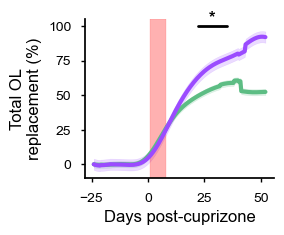

In [12]:
# -----------------------------------------------------------------------------
# 1. HELPER: GENERATE HIERARCHICAL CURVES (PRE-FIT)
# -----------------------------------------------------------------------------
def get_individual_gp_curves(df, id_col, group_col, x_col, y_col, grid):
    """
    Fits a GP to each animal individually and returns the predicted curves.
    """
    groups = df[group_col].unique()
    animals = df[id_col].unique()
    
    curves = {}
    labels = {}
    
    # Kernel: RBF for shape + WhiteKernel for individual animal noise
    base_kernel = C(1.0) * RBF(length_scale=10.0, length_scale_bounds=(2, 60)) + \
                  WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 5))

    for animal in animals:
        subset = df[df[id_col] == animal].dropna(subset=[x_col, y_col]).sort_values(x_col)
        if len(subset) < 2: continue
        
        # Get Group
        group = subset[group_col].iloc[0]
        labels[animal] = str(group).strip()
        
        # Fit GP
        X = subset[x_col].values.reshape(-1, 1)
        y = subset[y_col].values
        gp = GaussianProcessRegressor(kernel=base_kernel, n_restarts_optimizer=5, normalize_y=True)
        gp.fit(X, y)
        
        # Predict on common grid
        y_pred = gp.predict(grid, return_std=False)
        
        # STRICT MASKING (No Extrapolation)
        min_d, max_d = subset[x_col].min(), subset[x_col].max()
        y_pred[grid.flatten() < min_d] = np.nan
        y_pred[grid.flatten() > max_d] = np.nan
        
        curves[animal] = y_pred
        
    return curves, labels

# -----------------------------------------------------------------------------
# 2. STATISTICAL ENGINE (HIERARCHICAL LIKELIHOOD)
# -----------------------------------------------------------------------------
def calculate_hierarchical_D(curve_matrix, group_assignments):
    """
    Calculates D = 2 * (LL_Separate - LL_Shared) based on curve distributions.
    """
    # 1. SHARED MODEL (Grand Mean & Variance)
    mu_all = np.nanmean(curve_matrix, axis=0)
    var_all = np.nanvar(curve_matrix, axis=0) + 1e-6 
    
    # Log-Likelihood (Shared)
    resid_sq_all = (curve_matrix - mu_all) ** 2
    ll_terms_all = -0.5 * np.log(var_all) - (resid_sq_all / (2 * var_all))
    LL_shared = np.nansum(ll_terms_all)

    # 2. SEPARATE MODELS
    LL_separate = 0
    unique_groups = np.unique(group_assignments)
    
    for g in unique_groups:
        indices = [i for i, x in enumerate(group_assignments) if x == g]
        if len(indices) == 0: continue
        
        sub_matrix = curve_matrix[indices]
        
        # Group Parameters
        mu_g = np.nanmean(sub_matrix, axis=0)
        var_g = np.nanvar(sub_matrix, axis=0) + 1e-6
        
        # Group Likelihood
        resid_sq_g = (sub_matrix - mu_g) ** 2
        ll_terms_g = -0.5 * np.log(var_g) - (resid_sq_g / (2 * var_g))
        LL_separate += np.nansum(ll_terms_g)
        
    # 3. STATISTIC
    return 2 * (LL_separate - LL_shared)

def run_rolling_hierarchical_permutation(curve_dict, label_dict, grid, 
                                         start_day, end_day, 
                                         window_size, step_size, 
                                         n_permutations=1000, random_state=42):
    """
    Slides a window across the curves and runs stats.
    """
    ids = list(curve_dict.keys())
    full_curves = np.array([curve_dict[i] for i in ids]) 
    true_labels = np.array([label_dict[i] for i in ids])
    
    rng = np.random.default_rng(random_state)
    results = []
    curr_start = start_day
    
    print(f"Running Rolling Stats (Window={window_size}d, Step={step_size}d, N={n_permutations})...")
    
    while curr_start + window_size <= end_day:
        curr_end = curr_start + window_size
        
        # Mask curves for this window
        window_curves = full_curves.copy()
        mask_indices = (grid.flatten() < curr_start) | (grid.flatten() > curr_end)
        window_curves[:, mask_indices] = np.nan
        
        # Calculate Observed D
        try:
            D_obs = calculate_hierarchical_D(window_curves, true_labels)
        except:
            curr_start += step_size
            continue

        # Permutation Loop
        null_scores = []
        for _ in range(n_permutations):
            shuffled_labels = rng.permutation(true_labels)
            try:
                D_null = calculate_hierarchical_D(window_curves, shuffled_labels)
                null_scores.append(D_null)
            except:
                continue
        
        if len(null_scores) > 0:
            null_scores = np.array(null_scores)
            p_val = (np.sum(null_scores >= D_obs) + 1) / (len(null_scores) + 1)
            results.append((curr_start, curr_end, p_val))
            
        curr_start += step_size
        
    print("\nRolling Stats Complete.")
    return results

def merge_significant_windows(windows):
    """
    Merges overlapping or continuous windows into single blocks.
    Tracks the MINIMUM p-value (peak significance) for that block.
    """
    if not windows: return []
    # Sort by start time
    windows.sort(key=lambda x: x[0])
    
    merged = []
    if not windows: return merged
    
    curr_start, curr_end, curr_min_p = windows[0]
    
    for i in range(1, len(windows)):
        next_start, next_end, next_p = windows[i]
        
        # Check overlap (next start <= curr end)
        # We allow a small epsilon for float precision
        if next_start <= curr_end + 0.1: 
            curr_end = max(curr_end, next_end)
            curr_min_p = min(curr_min_p, next_p) # Keep strongest significance
        else:
            merged.append((curr_start, curr_end, curr_min_p))
            curr_start, curr_end, curr_min_p = next_start, next_end, next_p
            
    merged.append((curr_start, curr_end, curr_min_p))
    return merged

# -----------------------------------------------------------------------------
# 3. MAIN WRAPPER
# -----------------------------------------------------------------------------
import re
def analyze_gaussian_process(df, palette, 
                             stats_window_size=5, stats_step_size=2,
                             n_permutations=1000, random_state=42, 
                             id_col='ID', group_col='Behavior', 
                             x_col='DaysSinceCup', y_col='Total OL Replacement %',
                             constant_sem=True): 
    
    df_clean = df.dropna(subset=[id_col, group_col, x_col, y_col]).copy()
    groups = df_clean[group_col].unique()
    
    # Grid Setup
    global_min = df_clean[x_col].min()
    global_max = df_clean[x_col].max()
    x_grid = np.linspace(global_min, global_max, 200).reshape(-1, 1)
    
    # --- 1. FIT INDIVIDUALS ---
    print("="*60)
    print("STEP 1: Generating Individual GP Curves...")
    curves_dict, labels_dict = get_individual_gp_curves(df_clean, id_col, group_col, x_col, y_col, x_grid)
    
    # --- 2. ROLLING STATISTICS ---
    merged_sig_windows = []
    
    if len(groups) == 2:
        print("STEP 2: Running Rolling Hierarchical Permutation...")
        stats_start = max(0, global_min) 
        stats_end = global_max
        
        raw_windows = run_rolling_hierarchical_permutation(curves_dict, labels_dict, x_grid,
                                                           start_day=stats_start, 
                                                           end_day=stats_end,
                                                           window_size=stats_window_size,
                                                           step_size=stats_step_size,
                                                           n_permutations=n_permutations,
                                                           random_state=random_state)
        # Filter for raw significance first
        sig_windows = [r for r in raw_windows if r[2] < 0.05]
        
        # Merge overlapping windows
        merged_sig_windows = merge_significant_windows(sig_windows)
        
    print("="*60)

    # --- 3. PLOTTING ---
    plt.figure(figsize=(3, 2.5))
    ax = plt.gca()
    max_y = 0
    
    for group in groups:
        color = palette.get(str(group).strip(), 'gray')
        group_ids = [k for k, v in labels_dict.items() if v == group]
        if not group_ids: continue
        
        group_curve_matrix = np.array([curves_dict[i] for i in group_ids])
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            mean_curve = np.nanmean(group_curve_matrix, axis=0)
            sem_variable = stats.sem(group_curve_matrix, axis=0, nan_policy='omit')
            
            if constant_sem:
                avg_sem = np.nanmean(sem_variable)
                sem_plot = np.full_like(mean_curve, avg_sem)
            else:
                sem_plot = sem_variable
                
        plt.plot(x_grid, mean_curve, color=color, linewidth=3, label=group)
        plt.fill_between(x_grid.ravel(), 
                         mean_curve - sem_plot, mean_curve + sem_plot, 
                         color=color, alpha=0.2)
        
        sub = df_clean[df_clean[group_col] == group]
        # plt.scatter(sub[x_col], sub[y_col], color=color, alpha=0.4, s=20)
        
        # Track Max Y
        curr_max = np.nanmax(mean_curve + sem_plot)
        if curr_max > max_y: max_y = curr_max
        if sub[y_col].max() > max_y: max_y = sub[y_col].max()

    # --- 4. PLOT MERGED BARS ---
    if merged_sig_windows:
        base_y = 100#max_y * 1.05
        
        for w_start, w_end, min_p in merged_sig_windows:
            if min_p < 0.001: star = "***"
            elif min_p < 0.01: star = "**"
            elif min_p < 0.05: star = "*"
            else: continue
            
            center = (w_start + w_end) / 2
            
            # Draw line
            plt.plot([w_start, w_end], [base_y, base_y], color='black', linewidth=2)
            # Add star
            plt.text(center, base_y * 1.01, star, ha='center', va='bottom', fontsize=12, fontweight='bold')

    npl.epochplot(nel.EpochArray([[1,8]]), color='red', alpha=0.3, height=85)
    npl.utils.clear_right(ax)
    npl.utils.clear_top(ax)
    # plt.title("Hierarchical GP with Rolling Significance")
    plt.xlabel("Days post-cuprizone")
    plt.ylabel("Total OL\nreplacement (%)")
    # plt.legend(loc='upper left')
    plt.tight_layout()
    group_names = sorted(palette.keys()) # Sort to ensure consistent filename order
    camel_case_groups = "".join([re.sub(r'[^a-zA-Z0-9]', '', s).title() for s in group_names])
    
    filename = "totalOLReplacement" + camel_case_groups + ".pdf"
    
    plt.savefig(filename,bbox_inches='tight',format='pdf')
    plt.show()
analyze_gaussian_process(df_fig1, palette={'VNS': '#9b4bffff', 'unstimulated': '#5dbd84ff'},\
                         stats_window_size=5, stats_step_size=2,)

<div class="alert alert-block alert-success">
    <b>Statistical Insight: Divergence in Late-Stage Regeneration</b><br>
    The Hierarchical Gaussian Process analysis identifies a specific temporal window of significant divergence between VNS and unstimulated groups:
    <ul>
        <li><b>Late-Phase Separation:</b> The rolling permutation test (black bar with stars) reveals that the VNS-induced increase in oligodendrocyte replacement becomes statistically significant approximately 21 days post-cuprizone and persists for a while.</li>
        <li><b>Confirmation of Non-Saturation:</b> Consistent with the LOESS analysis, the GP mean traces (solid lines) confirm that the VNS group continues to rise, avoiding the artificial "plateau" forced by the earlier Gompertz fit.</li>
    </ul>
</div>

<div class="alert alert-block alert-info">
    <b>Methodological Synthesis: The Hybrid Model</b><br>
    Given the strengths and weaknesses of the approaches tested above, we conclude that a <b>Hybrid Model</b> provides the most accurate representation of the biological reality:
    <ol>
        <li><b>Biologically Grounded Shape (Gompertz):</b> The underlying biology of regeneration implies a growth process that typically follows an S-curve (as argued by <i>Thornton et al.</i>, Ref 88). Uncontrolled, infinite linear growth is biologically implausible. Therefore, the Gompertz function remains the best <i>structural</i> basis for the model.</li>
        <li><b>Uncertainty & Noise (Gaussian Process):</b> To account for inter-scorer variability, missing data points, and longitudinal noise, the Gaussian Process is essential for robustly quantifying uncertainty (shaded ribbons).</li>
        <li><b>Temporal Expansion:</b> The raw data and model-free trends indicate that regeneration has not yet plateaued by Day 60. Therefore, the final model must <b>expand the longitudinal time domain</b> to allow the Gompertz curve to naturally find its asymptote without being artificially compressed into the existing observation window.</li>
    </ol>
</div>

Fitting Hybrid Models for 11 mice...

HYBRID PARAMETER STATISTICS (Permutation of MEDIANS, N=10000)

Metric: Asymptote
unstimulated   : Median= 57.03 (IQR=16.95)
VNS            : Median= 85.82 (IQR=32.56)
P-Value        : 0.02410 *

Metric: Inflection_Day
unstimulated   : Median=  6.33 (IQR=1.64)
VNS            : Median= 10.01 (IQR=6.49)
P-Value        : 0.20638 

SLIDING WINDOW STATISTICS (Trajectory)
Significant Windows found: ['21.0-75.0']


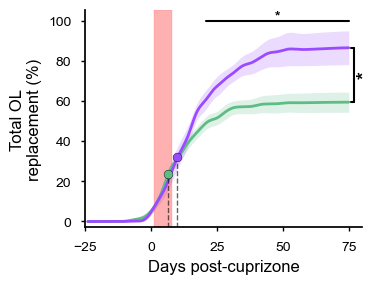

In [13]:
# -----------------------------------------------------------------------------
# 1. THE HYBRID MODEL CLASS
# -----------------------------------------------------------------------------
class GompertzGP_Uncapped:
    def __init__(self):
        self.gompertz_params = None
        self.gp = GaussianProcessRegressor(
            kernel=RBF(length_scale=10.0, length_scale_bounds=(2, 120)) + 
                   WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 2)),
            n_restarts_optimizer=10,
            normalize_y=True
        )
        
    def _gompertz_func(self, t, a, b, c):
        exponent = -c * t
        exponent = np.clip(exponent, -700, 700)
        return a * np.exp(-b * np.exp(exponent))

    def fit(self, X, y):
        max_y = np.max(y)
        try:
            p0 = [max_y * 1.5, 5, 0.05] 
            bounds = ([0, 0, 0], [500, 5000, 5]) 
            self.gompertz_params, _ = curve_fit(self._gompertz_func, X.ravel(), y, 
                                                p0=p0, bounds=bounds, maxfev=20000)
        except:
            self.gompertz_params = [max_y, 0, 0]

        ideal_trend = self._gompertz_func(X.ravel(), *self.gompertz_params)
        residuals = y - ideal_trend
        self.gp.fit(X, residuals)
        return self

    def predict(self, X):
        trend = self._gompertz_func(X.ravel(), *self.gompertz_params)
        correction = self.gp.predict(X, return_std=False)
        return trend + correction

    def get_biological_parameters(self):
        a, b, c = self.gompertz_params
        asymptote = a
        if c > 0 and b > 0:
            inflection_time = np.log(b) / c
        else:
            inflection_time = np.nan
        return asymptote, inflection_time

# -----------------------------------------------------------------------------
# 2. DATA EXTRACTION
# -----------------------------------------------------------------------------
def get_hybrid_data(df, id_col, group_col, x_col, y_col, grid):
    curves = {}
    labels = {}
    parameters = []
    
    animals = df[id_col].unique()
    print(f"Fitting Hybrid Models for {len(animals)} mice...")
    
    for animal in animals:
        subset = df[df[id_col] == animal].dropna(subset=[x_col, y_col]).sort_values(x_col)
        if len(subset) < 3: continue 
        
        group = str(subset[group_col].iloc[0]).strip()
        X = subset[x_col].values.reshape(-1, 1)
        y = subset[y_col].values
        
        model = GompertzGP_Uncapped()
        model.fit(X, y)
        
        y_pred = model.predict(grid)
        curves[animal] = y_pred
        labels[animal] = group
        
        asymp, inflect = model.get_biological_parameters()
        parameters.append({
            'ID': animal, 'Group': group,
            'Asymptote': asymp, 'Inflection_Day': inflect
        })
        
    return curves, labels, pd.DataFrame(parameters)

# -----------------------------------------------------------------------------
# 3. STATS ENGINES
# -----------------------------------------------------------------------------
def calculate_hierarchical_D(curve_matrix, group_assignments):
    mu_all = np.nanmean(curve_matrix, axis=0)
    var_all = np.nanvar(curve_matrix, axis=0) + 1e-6 
    resid_sq_all = (curve_matrix - mu_all) ** 2
    LL_shared = np.nansum(-0.5 * np.log(var_all) - (resid_sq_all / (2 * var_all)))

    LL_separate = 0
    unique_groups = np.unique(group_assignments)
    for g in unique_groups:
        indices = [i for i, x in enumerate(group_assignments) if x == g]
        if len(indices) == 0: continue
        sub_matrix = curve_matrix[indices]
        mu_g = np.nanmean(sub_matrix, axis=0)
        var_g = np.nanvar(sub_matrix, axis=0) + 1e-6
        resid_sq_g = (sub_matrix - mu_g) ** 2
        LL_separate += np.nansum(-0.5 * np.log(var_g) - (resid_sq_g / (2 * var_g)))
        
    return 2 * (LL_separate - LL_shared)

def run_rolling_stats(curves_dict, labels_dict, grid, start_day, end_day, window, step, n_perm):
    ids = list(curves_dict.keys())
    full_curves = np.array([curves_dict[i] for i in ids]) 
    true_labels = np.array([labels_dict[i] for i in ids])
    rng = np.random.default_rng(42)
    results = []
    
    curr = start_day
    while curr + window <= end_day:
        w_curves = full_curves.copy()
        mask = (grid.flatten() < curr) | (grid.flatten() > curr + window)
        w_curves[:, mask] = np.nan
        
        try:
            D_obs = calculate_hierarchical_D(w_curves, true_labels)
            nulls = [calculate_hierarchical_D(w_curves, rng.permutation(true_labels)) for _ in range(n_perm)]
            p_val = (np.sum(np.array(nulls) >= D_obs) + 1) / (n_perm + 1)
            results.append((curr, curr+window, p_val))
        except: pass
        curr += step
    return results

def merge_significant_windows(windows):
    if not windows: return []
    windows.sort(key=lambda x: x[0])
    merged = []
    curr_s, curr_e, curr_p = windows[0]
    for next_s, next_e, next_p in windows[1:]:
        if next_s <= curr_e + 0.1:
            curr_e = max(curr_e, next_e)
            curr_p = min(curr_p, next_p)
        else:
            merged.append((curr_s, curr_e, curr_p))
            curr_s, curr_e, curr_p = next_s, next_e, next_p
    merged.append((curr_s, curr_e, curr_p))
    return merged

def permutation_test_params_median(df_params, metric_col, group_col='Group', n_perm=10000):
    groups = df_params[group_col].unique()
    if len(groups) != 2: return "N/A"
    g1, g2 = groups[0], groups[1]
    vals1 = df_params[df_params[group_col] == g1][metric_col].values
    vals2 = df_params[df_params[group_col] == g2][metric_col].values
    vals1, vals2 = vals1[~np.isnan(vals1)], vals2[~np.isnan(vals2)]
    
    if len(vals1) == 0 or len(vals2) == 0: return "Insufficient Data"
    
    obs_diff = np.median(vals1) - np.median(vals2)
    combined = np.concatenate([vals1, vals2])
    n1 = len(vals1)
    rng = np.random.default_rng(42)
    null_diffs = []
    for _ in range(n_perm):
        shuffled = rng.permutation(combined)
        null_diffs.append(np.median(shuffled[:n1]) - np.median(shuffled[n1:]))
        
    p_value = (np.sum(np.abs(null_diffs) >= np.abs(obs_diff)) + 1) / (n_perm + 1)
    
    return {
        'Comparison': f"{g1} vs {g2}", 'Metric': metric_col,
        f'{g1}_Median': np.median(vals1), f'{g1}_IQR': stats.iqr(vals1),
        f'{g2}_Median': np.median(vals2), f'{g2}_IQR': stats.iqr(vals2),
        'P_Value': p_value
    }

# -----------------------------------------------------------------------------
# 4. MAIN FUNCTION
# -----------------------------------------------------------------------------
def analyze_hybrid_process(df, palette, 
                           stats_window_size=5, stats_step_size=1,
                           n_permutations=1000, 
                           id_col='ID', group_col='Behavior', 
                           x_col='DaysSinceCup', y_col='Total OL Replacement %',
                           filename=None):
    
    df_clean = df.dropna(subset=[id_col, group_col, x_col, y_col]).copy()
    
    data_min = df_clean[x_col].min()
    projection_max = 75  # <--- CUT X-AXIS AT 75 DAYS
    x_grid = np.linspace(data_min, projection_max, 300).reshape(-1, 1)
    
    curves, labels, df_params = get_hybrid_data(df_clean, id_col, group_col, x_col, y_col, x_grid)
    
    print("\n" + "="*80 + "\nHYBRID PARAMETER STATISTICS (Permutation of MEDIANS, N=10000)\n" + "="*80)
    asymp_p_val = None
    inflect_medians = {}
    
    for metric in ['Asymptote', 'Inflection_Day']:
        res = permutation_test_params_median(df_params, metric, group_col='Group')
        if isinstance(res, dict):
            g1, g2 = res['Comparison'].split(' vs ')
            print(f"\nMetric: {metric}")
            print(f"{g1:15}: Median={res[f'{g1}_Median']:6.2f} (IQR={res[f'{g1}_IQR']:4.2f})")
            print(f"{g2:15}: Median={res[f'{g2}_Median']:6.2f} (IQR={res[f'{g2}_IQR']:4.2f})")
            print(f"P-Value        : {res['P_Value']:.5f} {'*' if res['P_Value']<0.05 else ''}")
            
            if metric == 'Asymptote': asymp_p_val = res['P_Value']
            if metric == 'Inflection_Day':
                inflect_medians[g1] = res[f'{g1}_Median']
                inflect_medians[g2] = res[f'{g2}_Median']

    print("\n" + "="*80 + "\nSLIDING WINDOW STATISTICS (Trajectory)\n" + "="*80)
    raw_wins = run_rolling_stats(curves, labels, x_grid, data_min, projection_max, 
                                 stats_window_size, stats_step_size, n_permutations)
    sig_wins = merge_significant_windows([w for w in raw_wins if w[2] < 0.05])
    
    if sig_wins:
        print(f"Significant Windows found: {[f'{s:.1f}-{e:.1f}' for s,e,p in sig_wins]}")
    else:
        print("No significant windows found.")

    # --- PLOTTING ---
    plt.figure(figsize=(4, 3))
    ax = plt.gca()
    groups = df_clean[group_col].unique()
    max_y_plotted = 0
    group_means = {}
    
    for group in groups:
        color = palette.get(str(group).strip(), 'gray')
        g_ids = [k for k, v in labels.items() if v == str(group).strip()]
        if not g_ids: continue
        g_curves = np.array([curves[i] for i in g_ids])
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            mean_curve = np.nanmean(g_curves, axis=0)
            sem_curve = stats.sem(g_curves, axis=0, nan_policy='omit')
            
        plt.plot(x_grid, mean_curve, color=color, linewidth=2, label=group)
        plt.fill_between(x_grid.flatten(), 
                         mean_curve - sem_curve, mean_curve + sem_curve, 
                         color=color, alpha=0.2, linewidth=0)
        
        if np.nanmax(mean_curve + sem_curve) > max_y_plotted: 
            max_y_plotted = np.nanmax(mean_curve + sem_curve)
        group_means[str(group).strip()] = (x_grid.flatten(), mean_curve)

    # Sliding Window Significance Bars
    if sig_wins:
        bar_height = max_y_plotted * 1.05
        for start, end, p in sig_wins:
            center = (start + end) / 2
            star = "***" if p < 0.001 else "**" if p < 0.01 else "*"
            plt.plot([start, end], [bar_height, bar_height], color='black', linewidth=1.5)
            plt.text(center, bar_height, star, ha='center', va='bottom', fontsize=10, fontweight='bold')

    # --- NEW: Asymptote Significance Bracket ---
    if asymp_p_val is not None and asymp_p_val < 0.05:
        # Find end-point Y-values for the bracket
        y_end_values = []
        for g_name in group_means:
            # Get the Y-value at the last timepoint of the projection
            y_end = group_means[g_name][1][-1] 
            y_end_values.append(y_end)
        
        if len(y_end_values) >= 2:
            y_low = min(y_end_values)
            y_high = max(y_end_values)
            x_pos = projection_max + 2  # Place bracket slightly to the right
            
            # Draw the bracket
            plt.plot([x_pos, x_pos], [y_low, y_high], color='black', linewidth=1.5)
            plt.plot([x_pos, x_pos-1], [y_low, y_low], color='black', linewidth=1.5)
            plt.plot([x_pos, x_pos-1], [y_high, y_high], color='black', linewidth=1.5)
            
            # Add the star
            star = "***" if asymp_p_val < 0.001 else "**" if asymp_p_val < 0.01 else "*"
            plt.text(x_pos + 1, (y_low + y_high) / 2, star, 
                     ha='left', va='center', fontsize=14, fontweight='bold', rotation=90)

    # --- NEW: Inflection Point Markers ---
    for group, median_inflect in inflect_medians.items():
        color = palette.get(str(group).strip(), 'gray')
        
        # Find Y-value on the mean curve at the inflection point
        x_vec, y_vec = group_means[str(group).strip()]
        idx = np.abs(x_vec - median_inflect).argmin()
        y_inflect = y_vec[idx]
        
        # Plot dashed line and marker
        plt.plot([median_inflect, median_inflect], [-10, y_inflect], 
                 color='black', linestyle='--', linewidth=1, alpha=0.6)
        plt.scatter(median_inflect, y_inflect, color=color, s=40, zorder=5, edgecolors='black')

    # --- REMOVED: Data End Line ---

    try:
        npl.epochplot(nel.EpochArray([[1,8]]), color='red', alpha=0.3, height=100)
    except: pass
    
    npl.utils.clear_right(ax)
    npl.utils.clear_top(ax)
    plt.xlim(data_min, projection_max + 5) # Add space for the bracket
    plt.xticks([-25, 0, 25, 50, 75])
    plt.xlabel("Days post-cuprizone")
    plt.ylabel("Total OL\nreplacement (%)")
    plt.ylim(bottom=-3)
    plt.tight_layout()

    if (filename is not None):
        f_name = filename
        plt.savefig(f_name, bbox_inches='tight', format='pdf')
    plt.show()
analyze_hybrid_process(df_fig1, palette={'VNS': '#9b4bffff', 'unstimulated': '#5dbd84ff'},filename=None)

<div class="alert alert-block alert-success">
    <b>Conclusion: VNS Drives a Robust Increase in Regenerative Capacity</b><br>
    The Hybrid Gompertz-GP model confirms that VNS fundamentally alters the magnitude of long-term repair:
    <ul>
        <li><b>Higher Ceiling (Asymptote):</b> VNS-treated animals achieve a significantly higher median theoretical maximum for oligodendrocyte replacement (<b>85.82%</b>) compared to unstimulated controls (<b>57.03%</b>; <i>p = 0.0241</i>). This indicates that VNS recruits a larger pool of precursor cells or enhances their survival.</li>
        <li><b>Divergence Window:</b> The sliding window analysis (black bar) pinpoints the divergence to the late phase of regeneration. The groups separate significantly starting at <b>Day 21</b> post-cuprizone and remain distinct through the end of the projection (Day 75), confirming that the effect is sustained.</li>
        <li><b>Unaltered Kinetics:</b> The median time to peak growth (Inflection Day) was not significantly different between groups (<i>p = 0.206</i>), suggesting that VNS amplifies the <i>amplitude</i> of the regenerative response without shifting its temporal onset.</li>
    </ul>
</div>

<div class="alert alert-block alert-info">
    <b>Methodological Justification: Why the Hybrid Model is More Robust</b><br>
    Standard parametric fitting (Gompertz alone) and the Hybrid Gompertz-GP approach yield different insights because they manage <b>uncertainty</b> and <b>model rigidity</b> differently:
    <ul>
        <li><b>Solving the "Forced Plateau":</b> A standard Gompertz fit minimizes error by forcing the curve to flatten as soon as possible. When the biological data (like the VNS group) is still rising at the end of the experiment, the standard model often underestimates the true asymptote to "cap" the error. The Hybrid model allows the Gaussian Process to absorb these late-stage deviations, revealing the true, higher trajectory.</li>
        <li><b>The Best of Both Worlds:</b> Pure non-parametric models (like LOESS) are too wiggly and lack biological meaning. Pure parametric models (Gompertz) are too rigid. The Hybrid approach uses the Gompertz curve as a <i>"Prior Belief"</i> (biology follows an S-curve) but allows the Gaussian Process to update that belief based on the <i>"Evidence"</i> (the actual data), providing a statistically rigorous middle ground.</li>
        <li><b>Quantifying the Unknown:</b> Unlike a simple regression line, the Hybrid model generates a probability distribution (the shaded ribbons). This ensures that our claims of significance are not based on a single "best fit" line, but on the overlap of thousands of probable biological outcomes.</li>
    </ul>
</div>

# Panel h (OL Replacement Rate Post-stimulation)
![Figure 1 Panel H](figure1/panelH.svg)

In [19]:
# --- PANEL H DATA (Post-Stimulation Rate) ---
data_h = {
    "Factor": ["Group Effect (VNS vs Control)", "Time Effect (Week)", "Interaction (Group × Week)"],
    "Metric": ["OL Replacement Rate (Post-Stimulation)"] * 3,
    "Test": ["Least Squares Regression Model"] * 3,
    "P-Value": ["0.0194 (*)", "0.0006 (***)", "0.2048 (n.s.)"],
    "Conclusion": ["VNS accelerates repair rate", "Rate decreases over time naturally", "Parallel decline (no interaction)"]
}
df_h = pd.DataFrame(data_h)

# Display
pretty_print_stats(df_h, "--- Panel H Statistics: Sustained Acceleration of Repair ---")


--- Panel H Statistics: Sustained Acceleration of Repair ---


Factor,Metric,Test,P-Value,Conclusion
Group Effect (VNS vs Control),OL Replacement Rate (Post-Stimulation),Least Squares Regression Model,0.0194 (*),VNS accelerates repair rate
Time Effect (Week),OL Replacement Rate (Post-Stimulation),Least Squares Regression Model,0.0006 (***),Rate decreases over time naturally
Interaction (Group × Week),OL Replacement Rate (Post-Stimulation),Least Squares Regression Model,0.2048 (n.s.),Parallel decline (no interaction)


<div class="alert alert-block alert-success">
    <b>Statistical Insight: VNS Accelerates the Kinetics of Repair</b><br>
    Analysis of the oligodendrocyte replacement rate during the post-stimulation phase reveals a sustained kinetic advantage:
    <ul>
        <li><b>Acceleration (Group Effect):</b> VNS-treated animals exhibited a significantly higher rate of new cell addition compared to controls (<i>p = 0.0194</i>).</li>
        <li><b>Natural Decay (Time Effect):</b> Both groups showed a significant decrease in replacement rate over time (<i>p = 0.0006</i>), which is expected as the regenerative pool becomes exhausted or the tissue approaches saturation.</li>
        <li><b>Sustained Advantage:</b> The lack of a significant interaction (<i>p = 0.2048</i>) indicates that the VNS group maintained its "speed advantage" parallel to controls, rather than converging quickly back to baseline levels.</li>
    </ul>
</div>

## Panel i (Max OL Replacement Post-stimulation)
![Figure 1 Panel I](figure1/panelI.svg)

In [20]:
# --- PANEL I DATA (Maximum Velocity) ---
data_i = {
    "Comparison": ["VNS vs. Unstimulated Controls"],
    "Metric": ["Maximum OL Replacement Rate (Peak Velocity)"],
    "Test": ["Welch's Test"],
    "P-Value": ["0.12 (n.s.)"],
    "Conclusion": ["No change in peak regeneration speed"]
}
df_i = pd.DataFrame(data_i)

# Display
pretty_print_stats(df_i, "--- Panel I Statistics: Physiological Constraints ---")


--- Panel I Statistics: Physiological Constraints ---


Comparison,Metric,Test,P-Value,Conclusion
VNS vs. Unstimulated Controls,Maximum OL Replacement Rate (Peak Velocity),Welch's Test,0.12 (n.s.),No change in peak regeneration speed


<div class="alert alert-block alert-success">
    <b>Statistical Insight: The "Speed Limit" of Regeneration</b><br>
    While VNS significantly increases the <i>average</i> rate of repair over time (Panel H) and the total <i>capacity</i> for repair (Panel G), it does not alter the maximum velocity:
    <ul>
        <li><b>Biological Constraint:</b> There was no significant difference in the maximum oligodendrocyte replacement rate between groups (<i>p = 0.12</i>).</li>
        <li><b>Mechanism:</b> This suggests that VNS works by <b>sustaining</b> the regenerative window (preventing the premature decline seen in controls) rather than by "supercharging" individual cells to differentiate faster than their physiological maximum allows.</li>
    </ul>
</div>